# Pollution analysis

In this project we are going to analyze which country generates more pollution given 7 substances. We don't know which one is the more contaminant, so we're going to normalize the data in order to get some insight.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('air-pollution-2019.csv')
df

,Country,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
0,_World,97207281.40,71657163.15,5.272669e+08,13568072.79,1.433979e+08,5741293.44,61420591.28
1,Afghanistan,480669.59,327818.55,1.055394e+06,42136.77,2.696026e+05,14917.44,185026.85
2,Albania,23371.85,11538.71,5.095350e+04,2645.76,2.548026e+04,945.79,44259.67
3,Algeria,487160.68,66457.71,7.195098e+05,92518.06,7.095178e+05,69293.18,113819.64
4,American Samoa,245.68,389.74,6.719900e+02,27.00,2.948000e+02,13.72,178.32
...,...,...,...,...,...,...,...,...
211,Vietnam,1177238.84,852061.42,1.170892e+07,226891.68,2.296905e+06,90055.98,667801.76
212,Wallis and Futuna,139.26,141.59,3.690400e+02,23.67,8.407000e+01,10.29,205.20
213,Yemen,55096.00,37454.55,1.561796e+05,6447.93,1.339025e+05,2142.05,96966.02
214,Zambia,56674.37,1194391.89,1.899273e+06,80081.84,5.264204e+05,23038.70,160141.44


We need to drop the "_World" row. We also drop "Guam" because it has no data.

In [5]:
df = df[df["Country"] != "_World"]
df = df.drop(82,axis=0)

With this function we find the range in the dataframe series substraction the minimum from the maximum.

In [7]:
def find_range():
    range_dict = {}
    for col in df.columns[1:]:
        range_dict[col] = df[col].max() - df[col].min()
    return range_dict

In [8]:
range_dict = find_range()

We store the ranges in a dictionary.

In [9]:
range_dict

{'Nitrogen Oxide': 22635844.8,
 'Sulphur Dioxide': 12137897.600000001,
 'Carbon Monoxide': 148447207.76,
 'Organic Carbon': 2597599.93,
 'NMVOCs': 29404851.479999997,
 'Black Carbon': 1212819.81,
 'Ammonia': 12277065.739999998}

With this other function we are

In [8]:
df.columns[1:]

Index(['Nitrogen Oxide', 'Sulphur Dioxide', 'Carbon Monoxide',
       'Organic Carbon', 'NMVOCs', 'Black Carbon', 'Ammonia'],
      dtype='object')

With this other function we are going to calculate the pollution coefficient. For each row and substance, we are going to divide the value by the range. Then we are going to get the mean. So for example if a country is the maximum contaminant in a substance it will receive a value of 1. But if in another one get a 0.8 the mean will be 0.9.

In [10]:
def calculate_pollution(row):
    sum = 0
    for col in df.columns[1:]:
        sum += row[col]/range_dict[col]
    mean = round(sum/len(df.columns[1:]),3)
    return mean

We apply the function and storage the data in a new column.

In [11]:
df["pollution_coef"] = df.apply(calculate_pollution,axis=1)

In [12]:
df_sorted = df.sort_values(by="pollution_coef",ascending=False).head(5)

In [13]:
df_sorted

,Country,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia,pollution_coef
40,China,22635845.64,12137897.71,1.484472e+08,1926778.28,29404853.33,1212819.81,12277069.70,0.963
92,India,9476939.53,9672037.31,5.339256e+07,2597599.93,11053657.74,885926.98,10247139.62,0.645
206,United States,7679316.63,1921172.15,2.884336e+07,279399.57,10646076.14,128396.08,3628009.15,0.223
93,Indonesia,5038852.43,2595484.38,2.330981e+07,755683.79,7602169.19,269256.86,2003211.60,0.218
162,Russia,3650510.30,4936763.22,7.415945e+06,278986.61,3990978.97,156322.77,1177554.03,0.155


Let's represent the top 5 of countries by pollution coefficient.

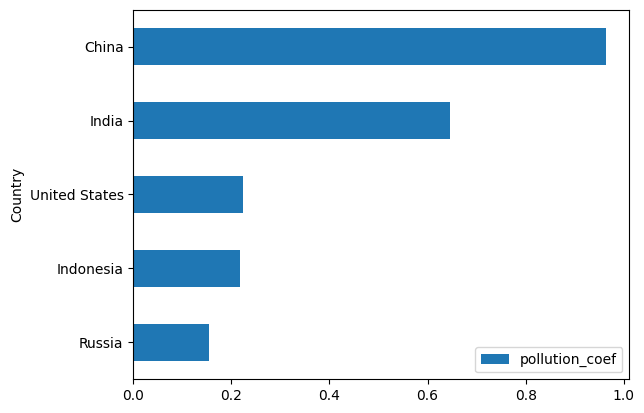

In [14]:
df_sorted.sort_values(by="pollution_coef").plot.barh(x="Country",y="pollution_coef")
plt.show()

We can make another graph with the different substances stacked so we can spot differences.

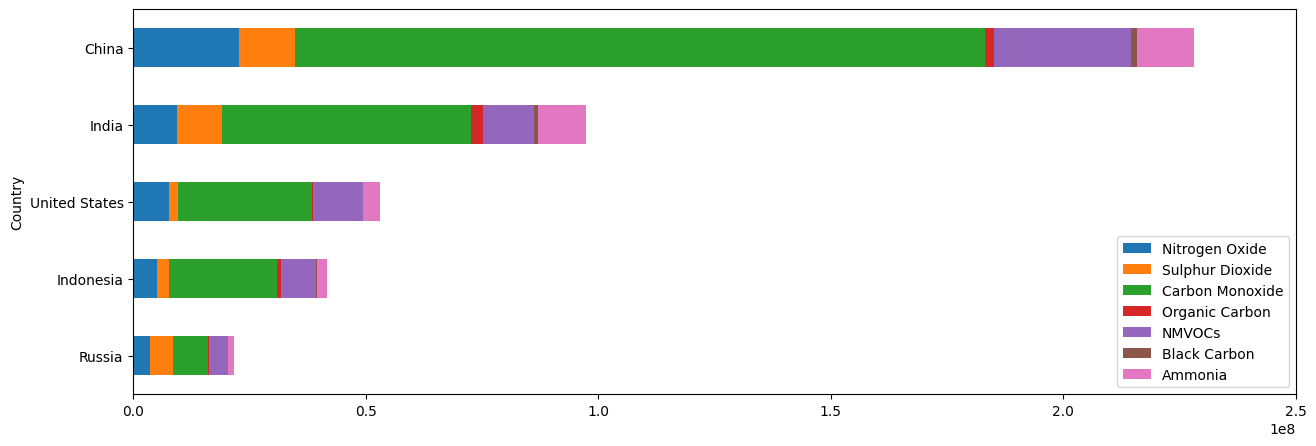

In [15]:
ax = df_sorted.sort_values(by="pollution_coef").iloc[:,:-1].plot.barh(x="Country",stacked=True,figsize=(15,5))
plt.xlim(0,2.5e8)
plt.show()

Now we are going to compare some countries with the european continent as a whole. We begin filtering them.

In [17]:
df_4 = df[df['Country'].str.contains('|'.join(["Europe","China","United States","India"]))]
df_4

,Country,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia,pollution_coef
40,China,22635845.64,12137897.71,1.484472e+08,1926778.28,29404853.33,1212819.81,12277069.70,0.963
92,India,9476939.53,9672037.31,5.339256e+07,2597599.93,11053657.74,885926.98,10247139.62,0.645
206,United States,7679316.63,1921172.15,2.884336e+07,279399.57,10646076.14,128396.08,3628009.15,0.223


In [9]:
europe_countries = pd.read_csv("countries_europe.csv")

We extract the countries into a list.

In [11]:
europe_countries_list = europe_countries['name'].tolist()

And then we filter the dataframe with that list.

In [ ]:
europe_df = df[df['Country'].str.contains('|'.join(europe_countries_list))]
europe = europe_df.sum()
europe["Country"] = "Europe"

In [13]:
europe

Country                 Europe
Nitrogen Oxide      7326743.09
Sulphur Dioxide     3255092.11
Carbon Monoxide    20949860.39
Organic Carbon       730609.18
NMVOCs              7839419.63
Black Carbon         221867.54
Ammonia             5319980.75
dtype: object

We convert it into a dataframe and the transpose it so we can concat it to the main dataframe.

In [20]:
europe_df = pd.DataFrame(europe).transpose()

In [21]:
df_4 = pd.concat([df_4,europe_df],ignore_index=True).tail(10)
df_4

,Country,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia,pollution_coef
0,China,22635845.64,12137897.71,148447211.5,1926778.28,29404853.33,1212819.81,12277069.7,0.963
1,India,9476939.53,9672037.31,53392563.74,2597599.93,11053657.74,885926.98,10247139.62,0.645
2,United States,7679316.63,1921172.15,28843362.52,279399.57,10646076.14,128396.08,3628009.15,0.223
3,Europe,7326743.09,3255092.11,20949860.39,730609.18,7839419.63,221867.54,5319980.75,0.27


Now we can see that Europe is the 3rd most contaminant area.

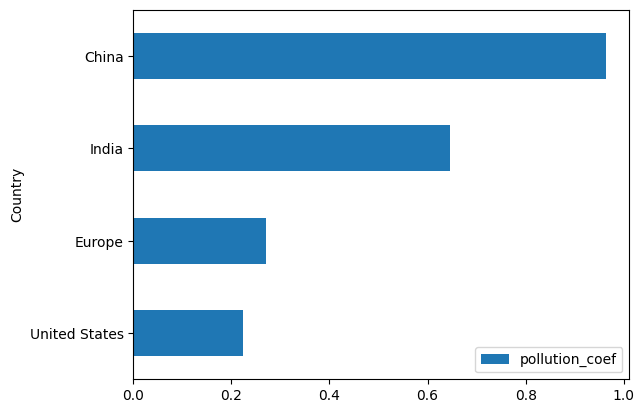

In [23]:
df_4.sort_values(by="pollution_coef").plot.barh(x="Country",y="pollution_coef")
plt.show()

### Conclusions

This is a simple exercise to show a data normalization. Not all the substances are equally dangerous and a lot of countries pollute a lot through the fabrication of products for richer countries, not because of the consumption, so with this data que can't blame anyone.